In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pylab import rcParams
rcParams['figure.figsize'] = 17,17

In [13]:
df=pd.read_csv('auto.csv')

In [14]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


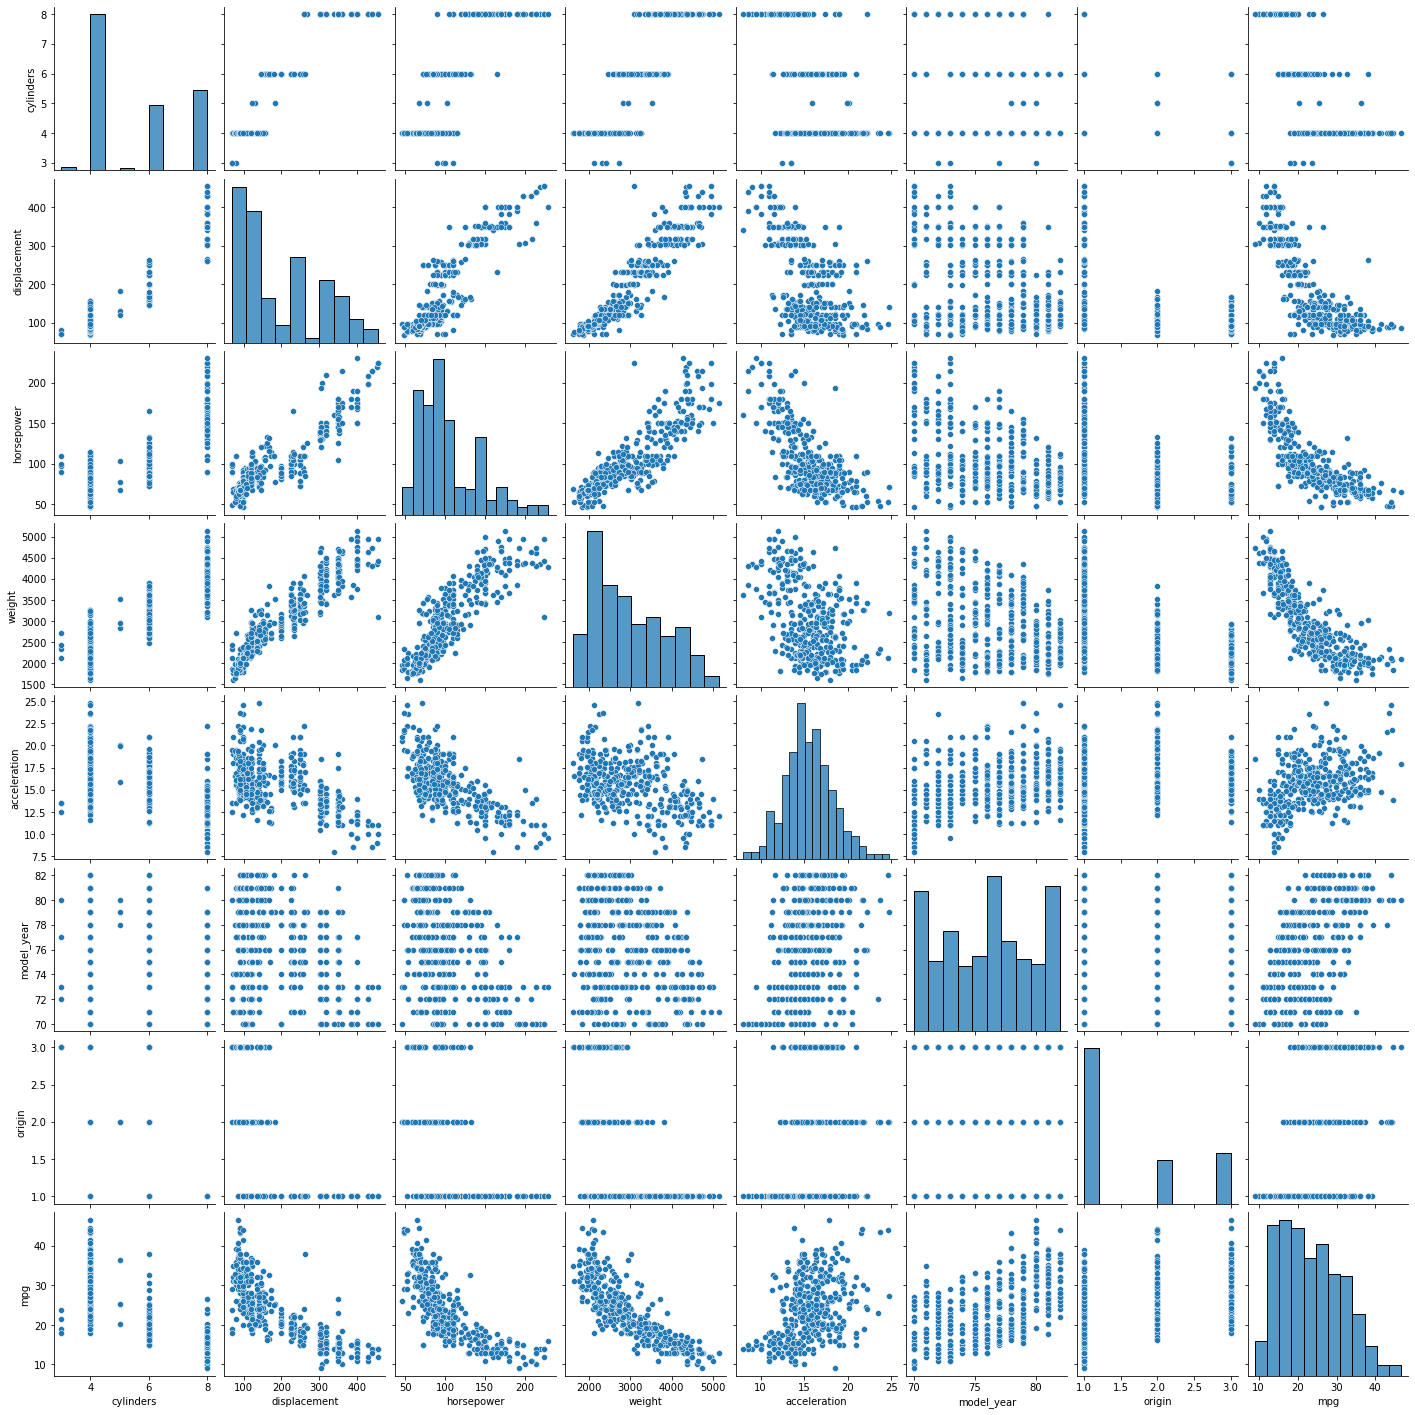

In [62]:
sns.pairplot(df)

In [28]:
corr_m=df.corr()

In [29]:
model=LinearRegression()

In [45]:
y=pd.DataFrame(df['mpg'])

In [46]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [50]:
x=pd.DataFrame(df.drop('mpg',axis=1))

In [51]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1
388,4,97.0,52.0,2130.0,24.6,82,2
389,4,135.0,84.0,2295.0,11.6,82,1
390,4,120.0,79.0,2625.0,18.6,82,1


In [52]:
model.fit(x,y)

LinearRegression()

In [53]:
model.intercept_

array([-17.21843462])

In [54]:
model.coef_

array([[-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
         0.75077268,  1.4261405 ]])

In [55]:
model_ols=smf.ols('mpg~horsepower+cylinders+displacement+weight+acceleration+model_year+origin',df).fit()

In [56]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          2.04e-139
Time:                        23:53:35   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [57]:
y_pred=model.predict(x)

In [63]:
model.score(x,y)

0.8214780764810597

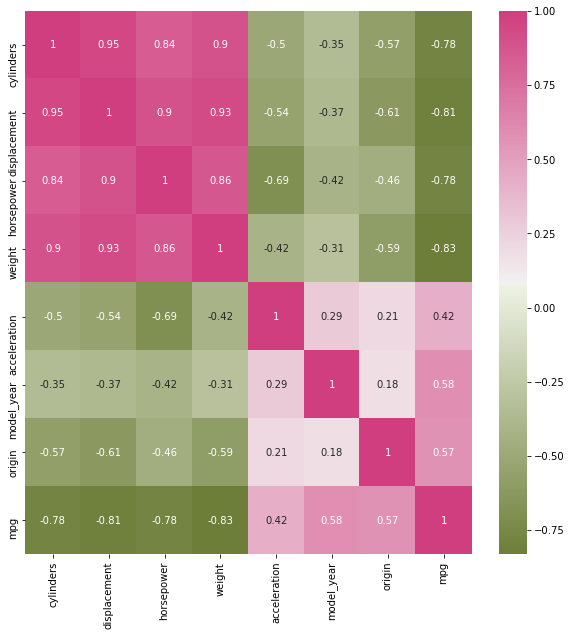

In [76]:
fig, ax = plt.subplots(figsize=(10,10))                               
cmap = sns.diverging_palette(100,350,as_cmap=True)
sns.heatmap(corr_m,annot=True,cmap=cmap)
plt.show()

In [81]:
corr_m['mpg'].sort_values(ascending=False)

mpg             1.000000
model_year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64